<a href="https://colab.research.google.com/github/sofia-sunny/Short_Introductory_Tutorials/blob/main/06_Similarity_Search_with_Pubchempy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Using pcp.get_compounds for Similarity Search**
The function **pcp.get_compounds()** from the pubchempy library is useful in similarity searches by retrieving a reference compound from PubChem using a known identifier such as a name, SMILES, or CID (PubChem Compound ID). For example, pcp.get_compounds(2244, 'cid') fetches the aspirin compound using its CID. Once retrieved, we can extract the compound's SMILES and uconvert it into a RDKit mol object and molecular fingerprint. This fingerprint is then compared to those of other compounds using similarity metrics such as the Tanimoto coefficient, allowing us to find structurally similar molecules for applications in drug discovery and virtual screening.


### Remember that the general syntax for **pcp.get_compounds()** is as follows:

## pcp.get_compounds (identifier, namespace, kwargs)

### **identifier:**
This is the unique identifier used to search for compounds. It can be a name, CID (PubChem Compound Identifier), SMILES string, InChI, formula, or another identifier that uniquely specifies a compound.

### **namespace:**
 This specifies the type of identifier being used. Common namespaces include:

**'cid':** PubChem Compound Identifier (default)
**'name':** Common name of the compound
**'smiles**': SMILES string

### **Example:**
aspirin = pcp.get_compounds('aspirin', 'name')
Here aspirin is the **identifier** and the name is the **namespace**

### **kwargs**: These are additional keyword arguments that allow you to specify further details about the search. Commonly used keyword arguments include:
* **searchtype:** Specifies the type of search to perform. For example, 'similarity' for similarity searches.

* **Threshold:** Used with similarity searches to set the similarity threshold.

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 15.0 MB/s eta 0:00:00


In [2]:
!pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13818 sha256=d5659a7ce5ab2f28cd9f2db30b07cb199fa7f9b161401d7a443da9208ea2163a
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy


In [14]:
# Importing necessary libraries
from rdkit import Chem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit.Chem import DataStructs
from rdkit.Chem import Draw
from IPython.display import display

In [4]:
import pubchempy as pcp

### **Example:** Perform a similarity search using the CID of aspirin
First we need to find the CID (PubChem Compound Identifier) of the aspirin using **pcp.get_compounds()**

The **pcp.get_compounds()** function returns a list of **Compound objects**. If only one compound matches the query, you will still get a list with a single Compound object. Each Compound object contains various attributes describing the compound, such as molecular formula, molecular weight, IUPAC name, and more

In [6]:
# Retrieve aspirin compound by name
aspirin_compound = pcp.get_compounds('aspirin', 'name') # The list of compound objects associated with aspirin
aspirin_cid = aspirin_compound[0].cid # The CID (PubChem Compound Identifier) of aspirin
print(f"Aspirin CID: {aspirin_cid}")


Aspirin CID: 2244


### **Find compounds similar to aspirin with at least 95% similarity**
To find compounds similar to aspirin with at least 95% similarity we need to use  some **kwargs** to specify the **searchtype** (what we want to search?) and **Threshold** (the minimum desired value).

**Using the general syntax for pcp.get_compounds():**

 pcp.get_compounds (identifier, namespace, kwargs)

**aspirin_cid:**  This is the identifire that  hold the PubChem Compound Identifier (CID) for aspirin.

**'cid'** This is the **namespace** that specifies that the search is being conducted using the CID of the compound.

**searchtype='similarity':** This argument indicates that the search should find compounds similar to the one identified by aspirin_cid. The search type could be different (like 'substructure' or 'superstructure'), but here it's specifically for similarity.

**Threshold=95:** This sets the similarity threshold to 95%. Only compounds that have a similarity score of 95% or higher to aspirin will be returned.


In [7]:
# Find compounds similar to aspirin with at least 95% similarity
similar_compounds = pcp.get_compounds(aspirin_cid, 'cid', searchtype='similarity', Threshold=95)

This retrieves compounds from the PubChem database that are at least 95% similar to aspirin, based on their chemical structure.
The resulting similar compounds are stored in the variable similar_compounds.


In [8]:
# Print the first 5 similar compounds
for compound in similar_compounds[:5]:
  print(f"CID: {compound.cid}, Name: {compound.iupac_name}, SMILES: {compound.isomeric_smiles}")


CID: 2244, Name: 2-acetyloxybenzoic acid, SMILES: CC(=O)OC1=CC=CC=C1C(=O)O
CID: 5161, Name: 2-(2-hydroxybenzoyl)oxybenzoic acid, SMILES: C1=CC=C(C(=C1)C(=O)OC2=CC=CC=C2C(=O)O)O
CID: 68484, Name: methyl 2-acetyloxybenzoate, SMILES: CC(=O)OC1=CC=CC=C1C(=O)OC
CID: 10745, Name: 2-(2-acetyloxybenzoyl)oxybenzoic acid, SMILES: CC(=O)OC1=CC=CC=C1C(=O)OC2=CC=CC=C2C(=O)O
CID: 3434975, Name: 2-acetyloxybenzoate, SMILES: CC(=O)OC1=CC=CC=C1C(=O)[O-]


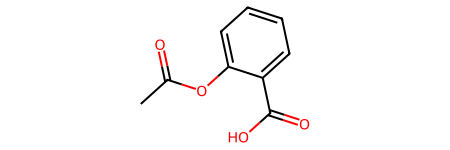

In [9]:
aspirin_mol = Chem.MolFromSmiles(aspirin_compound[0].isomeric_smiles)
aspirin_mol

Display the five most similar compounds to Aspirin

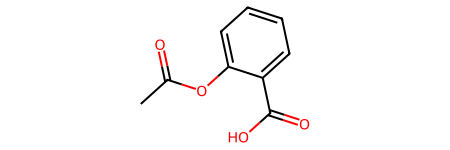

CID: 2244, Name: 2-acetyloxybenzoic acid


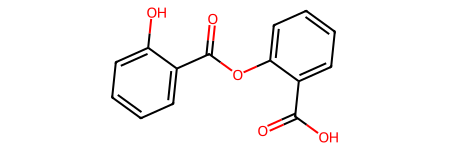

CID: 5161, Name: 2-(2-hydroxybenzoyl)oxybenzoic acid


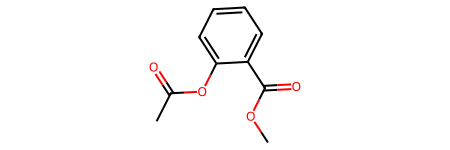

CID: 68484, Name: methyl 2-acetyloxybenzoate


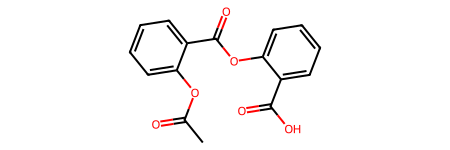

CID: 10745, Name: 2-(2-acetyloxybenzoyl)oxybenzoic acid


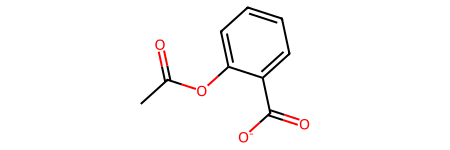

CID: 3434975, Name: 2-acetyloxybenzoate


In [10]:
for compound in similar_compounds[:5]:
  mol = Chem.MolFromSmiles(compound.isomeric_smiles)
  display(mol)
  print(f"CID: {compound.cid}, Name: {compound.iupac_name}")

### **Retrieve the common name (synonyms) of a compound using its CID.**


In [11]:
# Function to get common names using CID
def get_common_name(cid):
    # Retrieve the compound information using its CID
    compound = pcp.Compound.from_cid(cid)

    # Check if the compound has synonyms available
    if compound.synonyms:
        # Return the first two synonyms
        return compound.synonyms[0:2]
    else:
        # Return None if no synonyms are available
        return None


### **Example:**

In [12]:
# Example usage of above function to to get common names using CID
cid = 2244
common_names = get_common_name(cid)

# Print the retrieved common names
if common_names:
    print(f"Common names for CID {cid}: {common_names}")
else:
    print(f"No common names found for CID {cid}")

Common names for CID 2244: ['aspirin', 'ACETYLSALICYLIC ACID']


### **Retrieve two common names of compunds that are at least 95% similar to aspirin**
Use the **get_common_name function** to get two common names of the first five compounds in **similar_compounds** list


In [13]:
for compound in similar_compounds[:5]:
  cid = compound.cid
  common_names = get_common_name(cid)
  if common_names:
    print(f"Common names for CID {cid}: {common_names}")

Common names for CID 2244: ['aspirin', 'ACETYLSALICYLIC ACID']
Common names for CID 5161: ['Salsalate', '2-Carboxyphenyl salicylate']
Common names for CID 68484: ['Methyl 2-Acetoxybenzoate', 'Methyl O-acetylsalicylate']
Common names for CID 10745: ['530-75-6', 'ACETYLSALICYLSALICYLIC ACID']
Common names for CID 3434975: ['Acetylsalicylate', 'CHEBI:13719']


### **Another Example:**
### Getting the similarity score starting with the name of compounds.
Create a function to retrieve canonical SMILES string using compound name


In [15]:
def get_smiles(name):
    compound = pcp.get_compounds(name, 'name')
    if compound:
        return compound[0].canonical_smiles
    else:
        return None

Create a function to calculate Tanimoto similarity between two molecules


In [17]:
def calculate_tanimoto(smiles1, smiles2):
    # Convert SMILES strings to RDKit molecule objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    # Create a Morgan fingerprint generator
    morgan_gen = GetMorganGenerator(radius=2)

    # Generate molecular fingerprints for both molecules
    fp1 = morgan_gen.GetFingerprint(mol1)
    fp2 = morgan_gen.GetFingerprint(mol2)

    # Calculate the Tanimoto similarity between the fingerprints
    similarity = DataStructs.TanimotoSimilarity(fp1, fp2)

    return similarity

### **Examples:**
Find similarity between acetaminophen and caffeine

Tanimoto similarity between acetaminophen and caffeine: 0.10


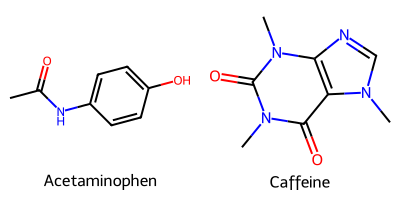

In [18]:
name_acetaminophen = "acetaminophen"
name_caffeine = "caffeine"

# Retrieve SMILES strings using compound names
smiles_acetaminophen = get_smiles(name_acetaminophen)
smiles_caffeine = get_smiles(name_caffeine)

# Ensure that both SMILES strings were retrieved successfully
if smiles_acetaminophen and smiles_caffeine:
    # Calculate the Tanimoto similarity
    tanimoto_similarity = calculate_tanimoto(smiles_acetaminophen, smiles_caffeine)

    # Print the result
    print(f"Tanimoto similarity between acetaminophen and caffeine: {tanimoto_similarity:.2f}")

    # Convert SMILES to RDKit molecule objects
    mol_acetaminophen = Chem.MolFromSmiles(smiles_acetaminophen)
    mol_caffeine = Chem.MolFromSmiles(smiles_caffeine)

    # Draw the structures
    img = Draw.MolsToImage([mol_acetaminophen, mol_caffeine], legends=['Acetaminophen', 'Caffeine'])
    display(img)
else:
    if not smiles_acetaminophen:
        print(f"Failed to retrieve SMILES for {name_acetaminophen}")
    if not smiles_caffeine:
        print(f"Failed to retrieve SMILES for {name_caffeine}")
